<b>Сначала производится импортирование необходимых модулей</b>

In [111]:
import pandas as pd
import pylab
import scipy.stats as sc

<b>Определение функций проверки критериев: Бартлетта для равенства дисперсий, Шапиро для проверки распределения на нормальность,
парного критерий Стьюдента для стат. значимости различий.</b>

In [116]:
def bartlett_test(data1, data2, per, alpha):
    print(f'Variances of distributions of {per} is '
          f'{"not" if sc.levene(data1, data2)[1] < alpha else ""}'
          f'equal')

In [117]:
def shapiro_test(data1, per, alpha):
    print(f'Distributions of {per} is '
          f'{"not" if sc.shapiro(data1).pvalue < alpha else ""}'
          f'normal')

In [118]:
def t_st(data1, data2, per, alpha):
    print(f'Diffs of {per} is '
          f'{"not " if sc.ttest_rel(data1, data2).pvalue < alpha else ""}'
          f'significant')

<b>Функция для расчета метрик</b>

In [119]:
def get_ratio(data1, data2, name, case=1):
    if case == 1:
        return pd.Series([el / el2 for el, el2 in zip(data1, data1 + data2)], name=name)
    elif case == 2:
        return pd.Series([el / el2 for el, el2 in zip(data1['metric_value'], data1['visits'])], name=name)

<b>Определение альфы и параметров из условия задачи</b>

In [120]:
al, dau, wau = 0.05, 500000, 850000

<b>Извлечение данных из csv</b>

In [121]:
df1 = pd.DataFrame(data=pd.read_csv('hw_abt_2_bybucket.csv', delimiter='\t'))

<b>Разделение данных на группы</b>

In [122]:
control_set, exp_set = df1[0:8], df1[8:]

<b>В соответствие с данными в файле и задании было решено рассчитать следующие метрики:
Косвенная характеристика - недельный коэффициент “прилипаемости” (kpp) пользователя к сервису = DAU / WAU </b>

In [123]:
kpp = dau / wau

In [124]:
kpp

0.5882352941176471

<b>Рассчитана следующая метрика для групп: Visits to sale conversion (vsc) - отношение числа успешных посещений к общему числу посещений.</b>

In [125]:
vsc_cont, vsc_exp = get_ratio(control_set['visits'], control_set['churn_visits'], 'vsc_cont'), \
                    get_ratio(exp_set['visits'], exp_set['churn_visits'], 'vsc_cont')

<b>Рассчитана следующая метрика для групп: Conversion rate (cr) - отношение числа пользователей, cовершивших целевое действие, к общему числу пользователей.</b>

In [126]:
cr_cont, cr_exp = get_ratio(control_set['users'], control_set['churn_users'], 'cr_cont'), \
                  get_ratio(exp_set['users'], exp_set['churn_users'], 'cr_exp')

<b>Рассчитана следующая метрика для групп: Order value (aov) - среднее значение одного целевого действия (сколько целевой метрики привлекло одно целевое действие (посещение) в среднем).</b>

In [127]:
aov_cont, aov_exp = get_ratio(data1=control_set, data2=None, name='aov_cont', case=2), \
                    get_ratio(data1=exp_set, data2=None, name='aov_exp', case=2)

<b>После получения метрик было проведено исследование на проверку равенства дисперсий в экспериментальной и контрольных группах.
Использован критерий Левена, так как он предоставляет возможность исследования равенства дисперсий 2-х выборок и менее чувствителен к отклонению от нормального.</b>

In [128]:
bartlett_test(vsc_cont, vsc_exp, 'vsc', al)
bartlett_test(cr_cont, cr_exp, 'cr', al)
bartlett_test(aov_cont, aov_exp, 'aov', al)

Variances of distributions of vsc is equal
Variances of distributions of cr is equal
Variances of distributions of aov is equal


<b>Также проведено исследование на проверку нормальности распределения в экспериментальной и контрольных группах. Использован критерий Шапиро, так как обладает большой мощностью. Также приведен qqplot для метрики vsc контрольной группы в качестве примера.</b>

In [129]:
shapiro_test(vsc_cont, 'vsc_cont', al)
shapiro_test(vsc_exp, 'vsc_exp', al)
shapiro_test(cr_cont, 'cr_cont', al)
shapiro_test(cr_cont, 'cr_exp', al)
shapiro_test(aov_cont, 'aov_cont', al)
shapiro_test(aov_cont, 'aov_exp', al)

Distributions of vsc_cont is normal
Distributions of vsc_exp is normal
Distributions of cr_cont is normal
Distributions of cr_exp is normal
Distributions of aov_cont is normal
Distributions of aov_exp is normal


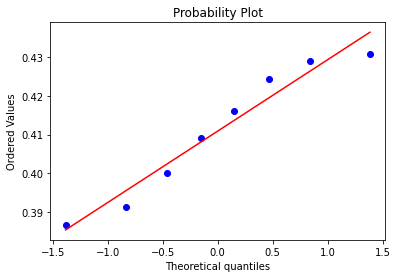

In [130]:
sc.probplot(vsc_cont, dist="norm", plot=pylab)
pylab.show()

<b>Для оценки статистической значимости различий исследуемых метрик в выборках выбран парный критерий Стьюдента. Данный критерий используется, как правило, в исследованиях со сравнением (в данном случае экспериментальная и контрольные группы)</b>

In [131]:
t_st(vsc_cont, vsc_exp, 'vsc', al)
t_st(cr_cont, cr_exp, 'cr', al)
t_st(aov_cont, aov_exp, 'aov', al)

Diffs of vsc is significant
Diffs of cr is not significant
Diffs of aov is significant


<b>Далее для построения диаграмм и гистограмм размаха преобразуем данные в несколько другой формат (Series в DataFrame)</b>

In [133]:
data_res = vsc_cont.to_frame()
data_res['vsc_exp'], data_res['cr_cont'] = vsc_exp, cr_cont
data_res['cr_exp'], data_res['aov_cont'] = cr_exp, aov_cont
data_res['aov_exp'] = aov_exp

<b>После преобразования построим диаграммы размаха для всех метрик и групп.</b>

<AxesSubplot:>

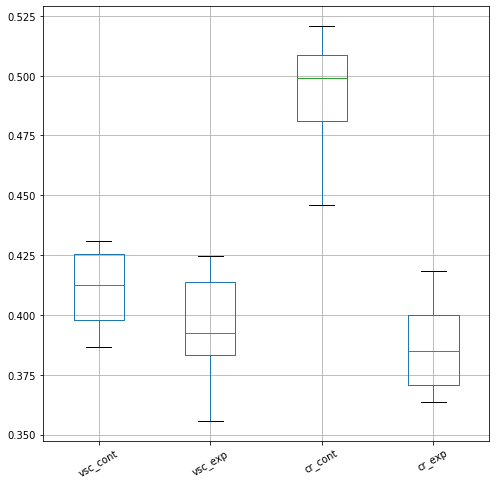

In [134]:
data_res.boxplot(column=['vsc_cont', 'vsc_exp', 'cr_cont', 'cr_exp'], rot=30, fontsize=10, figsize=(8,8))


<AxesSubplot:>

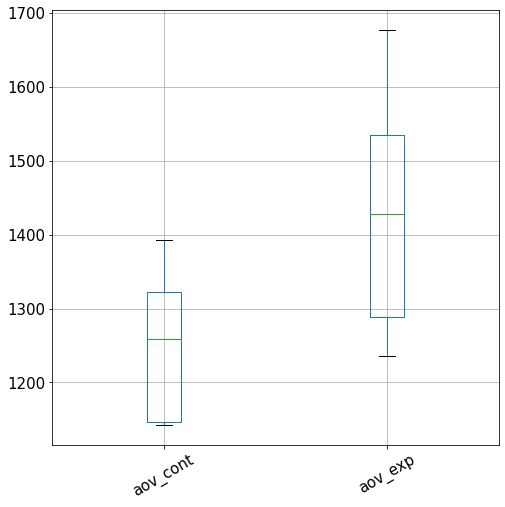

In [135]:
data_res.boxplot(column=['aov_cont', 'aov_exp'], rot=30, fontsize=15, figsize=(8,8))

array([[<AxesSubplot:title={'center':'vsc_cont'}>,
        <AxesSubplot:title={'center':'vsc_exp'}>],
       [<AxesSubplot:title={'center':'cr_cont'}>,
        <AxesSubplot:title={'center':'cr_exp'}>]], dtype=object)

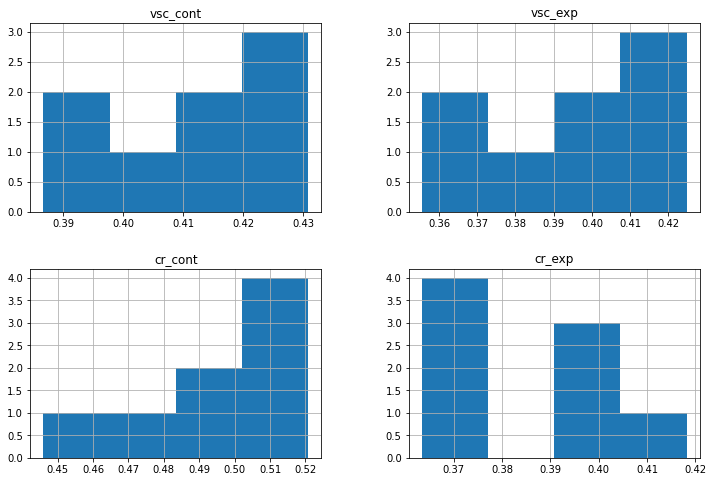

In [136]:
data_res.hist(column=['vsc_cont', 'vsc_exp', 'cr_cont', 'cr_exp'], bins=4, figsize = (12,8))

<b>Построим гистограммы для всех метрик и групп.</b>

array([[<AxesSubplot:title={'center':'aov_cont'}>,
        <AxesSubplot:title={'center':'aov_exp'}>]], dtype=object)

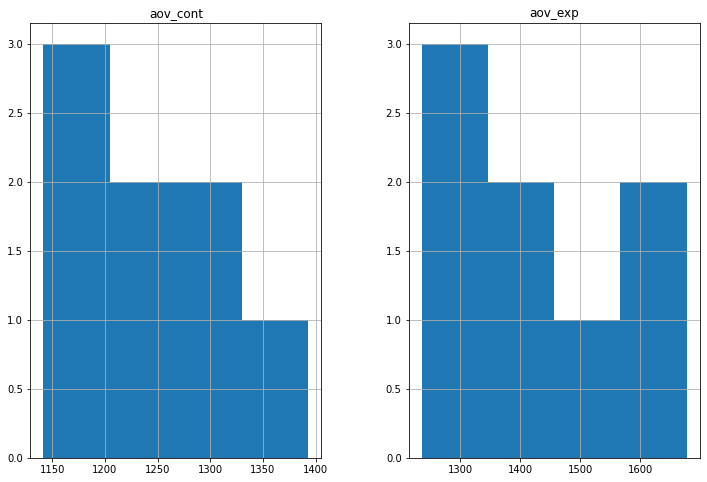

In [137]:
data_res.hist(column=['aov_cont', 'aov_exp'], bins=4, figsize = (12,8))

Стоит отметить, что размер выборок недостаточен для представления достоверных выводов.

In [115]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.08
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 2453.730
